<a href="https://colab.research.google.com/github/IdeaTechsquad/Feedback_changes/blob/main/Feedback_B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Loading the File

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#access the local file using python code
from google.colab import files
uploaded = files.upload()

Saving traincsv.csv to traincsv.csv


In [4]:
#reading the traincsv file
traindf = pd.read_csv("/content/traincsv.csv", low_memory=False)

traindf.head()


Customer_ID outlet_city luxury_sales fresh_sales dry_sales cluster_catgeory
0   10493832.0    Kelaniya       1209.6         756      5292                4
1   10178643.0    Moratuwa      1590.12     1060.08   6007.12                1
2   10513916.0     Wattala      2288.88     1481.04   9155.52                4
3   10334589.0     Wattala      2274.94     1739.66   9099.76                4
4   10458365.0    Kelaniya      2345.49     2069.55   9243.99                4

#Change of data type and change of values from non numerics to numerics

In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [6]:
traindf['cluster_catgeory'].unique()

array(['4', '1', '99', '2', '5', '3', '6', '6\\', '95', '98', nan, '100',
       '89'], dtype=object)

In [7]:
# Find rows where luxury_sales is NOT numeric
non_numeric_rows = traindf[~traindf["luxury_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["luxury_sales"]].drop_duplicates())  # Show unique non numeric values

                               luxury_sales
4234                                    NaN
80043     One thousand four hundread ruppes
175278                                  nul
297911               Eight hundread ruppess
326593              six hundread and hirty 
497177               Thousand tow hundread 
497245      seven hundread and nine ruppees
558562  Three thousand two hundread ruppess
753131   Four thousand one hundread ruppess


In [8]:
# Find rows where fresh_sales is NOT numeric
non_numeric_rows = traindf[~traindf["fresh_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["fresh_sales"]].drop_duplicates())

                                fresh_sales
4326                                    NaN
161810         Six hundread and five ruppes
174714                                  nul
326334     Three thousana and five hundread
558897             thirteen thousand ruppes
752816                 Five thousand ruppes
753256  Two thousand seven hundread ruppess


In [9]:
# Find rows where dry_sales is NOT numeric
non_numeric_rows = traindf[~traindf["dry_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["dry_sales"]].drop_duplicates())

                                    dry_sales
4929                                      NaN
148029  Four thousand and two hundread ruppes
174631                                    nul


In [10]:
# Find rows where Customer_id is NOT numeric
non_numeric_rows = traindf[~traindf["Customer_ID"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["Customer_ID"]].drop_duplicates())

        Customer_ID
497678          NaN


In [11]:
# Find rows where Cluster_category is NOT numeric
non_numeric_rows = traindf[~traindf["cluster_catgeory"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["cluster_catgeory"]].drop_duplicates())

       cluster_catgeory
3560                 6\
555560              NaN


In [12]:
# Find rows where outlet_city is numeric
non_numeric_rows = traindf[traindf["outlet_city"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["outlet_city"]].drop_duplicates())

Empty DataFrame
Columns: [outlet_city]
Index: []


There are no numeric values in outlet_city category

In [13]:
#Converting all non numeric values in luxury_Sales to numeric
# customer id 80043 in luxury sales converting 'One thousand four hundread ruppes' to numeric '1400'
traindf.loc[80043,"luxury_sales"] = 1400

#customer id 297911  in luxury sales converting 'Eight hundread ruppess' to numeric '800'
traindf.loc[297911 ,"luxury_sales"] = 800

#customer id 326593 in luxury sales converting 'six hundread and thirty' to numeric '630'
traindf.loc[326593,"luxury_sales"] = 630

#customer id 497177  in luxury sales converting 'Thousand tow hundread' to numeric '1200'
traindf.loc[497177 ,"luxury_sales"] = 1200

#customer id 497245 in luxury sales converting 'seven hundread and nine ruppees' to numeric '709'
traindf.loc[497245,"luxury_sales"] = 709

#customer id 558562 in luxury sales converting ' Three thousand two hundread ruppess' to numeric '3200'
traindf.loc[558562,"luxury_sales"] = 3200

#customer id 753131 in luxury sales converting 'Four thousand one hundread ruppess' to numeric '4100'
traindf.loc[753131,"luxury_sales"] = 4100

In [14]:
#results after converting non numeric values to numeric luxury sales
converted_txt_values = [80043,297911,326593,497177,497245,558562,753131]
traindf.loc[converted_txt_values]

Customer_ID   outlet_city luxury_sales fresh_sales dry_sales  \
80043    10774052.0      Kelaniya         1400        1118      5934   
297911   10189925.0      Kelaniya          800     4003.84   1059.84   
326593   10467590.0  Nuwara Eliya          630      3420.3    894.54   
497177   10537755.0         Kandy         1200        2041    6939.4   
497245   10468127.0         Kandy          709     1032.48   4194.45   
558562   10076064.0   Trincomalee         3200     10416.9   1923.12   
753131   10695296.0    Batticaloa         4100     4286.72   4034.56   

       cluster_catgeory  
80043                 4  
297911                2  
326593                2  
497177                1  
497245                1  
558562                6  
753131                3

In [15]:
#Converting all non numeric values in fresh_Sales to numeric
# customer id 161810 in fresh sales converting 'Six hundread and five ruppes' to numeric '605'
traindf.loc[161810,"fresh_sales"] = 605

#customer id 326334 in fresh sales converting 'Three thousand and five hundread' to numeric '3500'
traindf.loc[326334,"fresh_sales"] = 3500

#customer id 558897 in fresh sales converting 'thirteen thousand ruppes' to numeric '13000'
traindf.loc[558897,"fresh_sales"] = 13000

#customer id 752816 in fresh sales converting 'Five thousand ruppes' to numeric '5000'
traindf.loc[752816,"fresh_sales"] = 5000

#customer id 753256 in fresh sales converting 'Two thousand seven hundread ruppess' to numeric '2700'
traindf.loc[753256,"fresh_sales"] = 2700

In [16]:
#results after converting non numeric values to numeric fresh sales
converted_txt_values = [161810,326334,558897,752816,753256]
traindf.loc[converted_txt_values]

Customer_ID  outlet_city luxury_sales fresh_sales dry_sales  \
161810   10261075.0     Panadura       887.36         605    3604.9   
326334   10006007.0     Kaduwela       758.52        3500   1029.42   
558897   10314616.0   Batticaloa      3027.36       13000   2081.31   
752816   10369123.0  Trincomalee      5501.57        5000   5679.04   
753256   10369199.0      Colombo       2692.8        2700    2861.1   

       cluster_catgeory  
161810                4  
326334                2  
558897                6  
752816                3  
753256                1

In [17]:
#Converting all non numeric values in dry_Sales to numeric
# customer id 148029 in dry sales converting 'Four thousand and two hundread ruppes' to numeric '4200'
traindf.loc[148029,"dry_sales"] = 4200

In [18]:
#results after converting non numeric values to numeric dry sales
converted_txt_values = [148029]
traindf.loc[converted_txt_values]

Customer_ID             outlet_city luxury_sales fresh_sales  \
148029   10190107.0  Dehiwala-Mount Lavinia        931.5       931.5   

       dry_sales cluster_catgeory  
148029      4200                4

In [19]:
unique_values = traindf['cluster_catgeory'].unique()
print(unique_values)

['4' '1' '99' '2' '5' '3' '6' '6\\' '95' '98' nan '100' '89']


changing the datatypes to numeric variables



In [20]:
#replacing commas (,) with empty strings if they are used as thousands separators
traindf['luxury_sales'] = traindf['luxury_sales'].str.replace(',', '', regex=False)
traindf['fresh_sales'] = traindf['fresh_sales'].str.replace(',', '', regex=False)
traindf['dry_sales'] = traindf['dry_sales'].str.replace(',', '', regex=False)

In [21]:
#converting non-numeric values  float64
traindf['luxury_sales'] = pd.to_numeric(traindf['luxury_sales'], errors='coerce')
traindf['fresh_sales'] = pd.to_numeric(traindf['fresh_sales'], errors='coerce')
traindf['dry_sales'] = pd.to_numeric(traindf['dry_sales'], errors='coerce')

In [22]:
#rechecking the data type after changing it
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774110 non-null  float64
 3   fresh_sales       774105 non-null  float64
 4   dry_sales         774117 non-null  float64
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(4), object(2)
memory usage: 35.4+ MB


Initial EDA

# Initial EDA

Text(0.5, 1.0, 'trainCSV Missing Values')

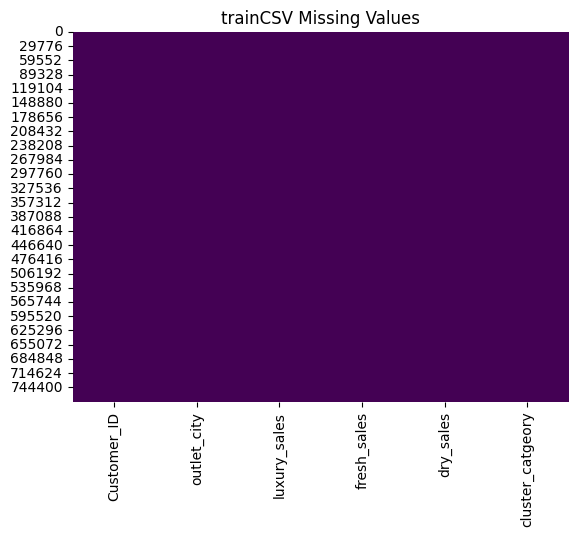

In [23]:
#Heatmap to identify  missing values in traincsv dataframe
sns.heatmap(traindf.isnull(),cbar=False,cmap='viridis')
plt.title('trainCSV Missing Values')

the missing values are not identifirable, because there is a large set of data in this dataset

Univariate Analysis

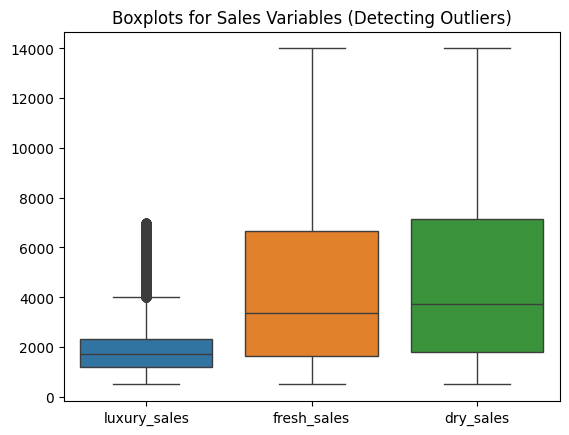

In [ ]:
#Boxplots to Identify Outliers for sales columns

plt.title('trainCSV Missing Values')
sns.boxplot(data=traindf[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.title("Boxplots for Sales Variables (Detecting Outliers)")
plt.show()

Text(0.5, 1.0, 'Distribution of luxury sales')

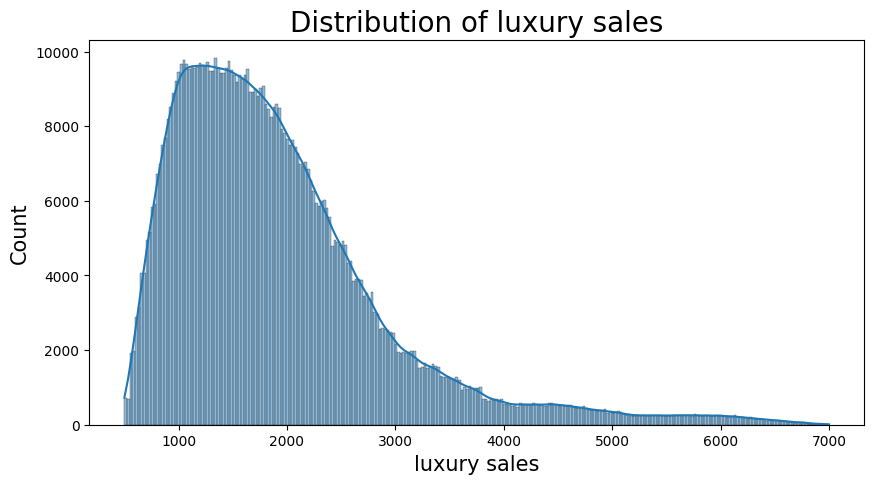

In [ ]:
#Distribution of luxury sales
plt.figure(figsize= (10,5))
ax = sns.histplot( data = traindf, x= traindf["luxury_sales"], kde=True)
ax.set_xlabel('luxury sales',fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Distribution of luxury sales', fontsize= 20)

Text(0.5, 1.0, 'Distribution of fresh sales')

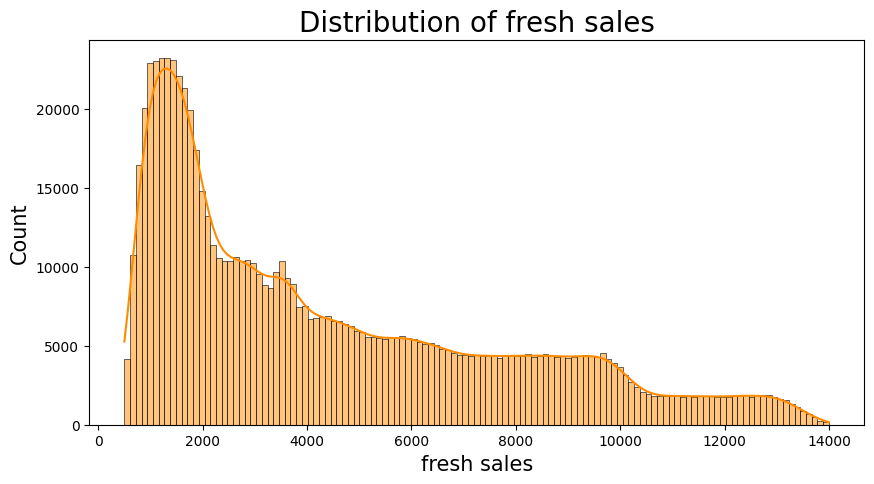

In [ ]:
#Distribution of fresh sales
plt.figure(figsize= (10,5))
ax = sns.histplot( data = traindf, x= traindf["fresh_sales"],kde=True,color = 'darkorange')
ax.set_xlabel('fresh sales',fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Distribution of fresh sales', fontsize= 20)

Text(0.5, 1.0, 'Distribution of dry sales')

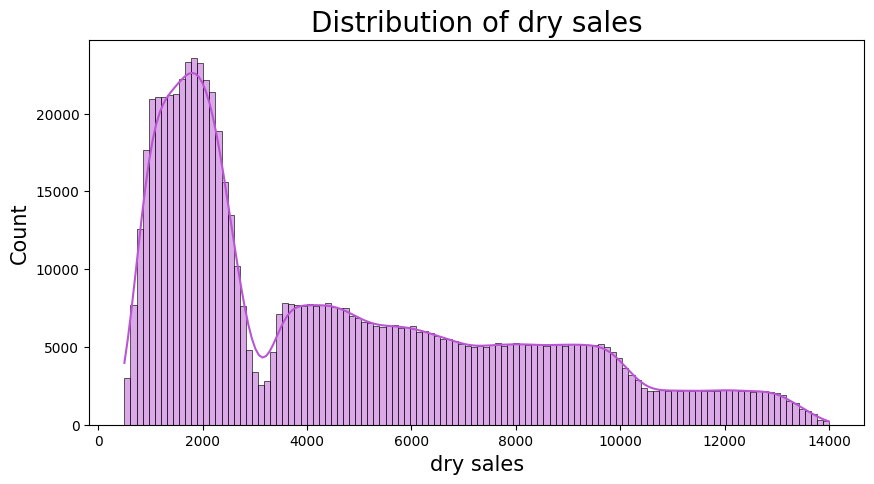

In [ ]:
#distribution of dry sales
plt.figure(figsize= (10,5))
ax = sns.histplot( data = traindf, x= traindf["dry_sales"],kde=True,color = 'MediumOrchid')
ax.set_xlabel('dry sales',fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Distribution of dry sales', fontsize= 20)

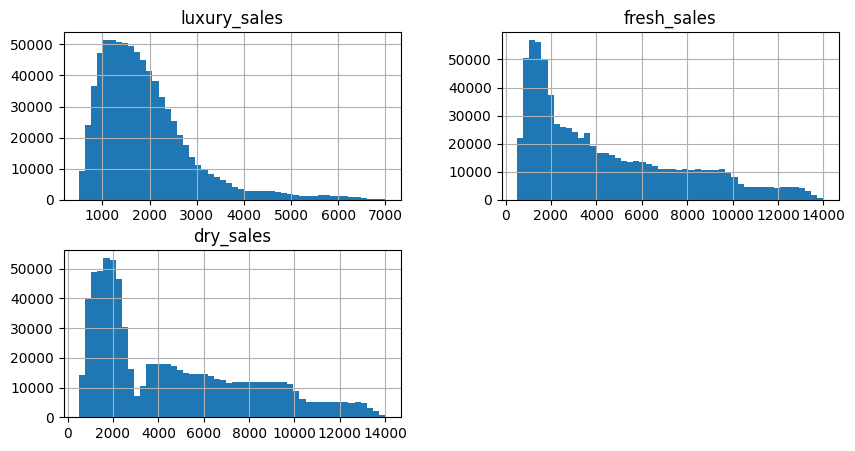

In [ ]:
#identifying the distribution of sales through histogram
traindf[['luxury_sales', 'fresh_sales', 'dry_sales']].hist(figsize=(10,5), bins=50)
plt.show()

Bivariate Analysis

Text(0.5, 1.0, 'Bivariate analysis of outlet city and luxury sales')

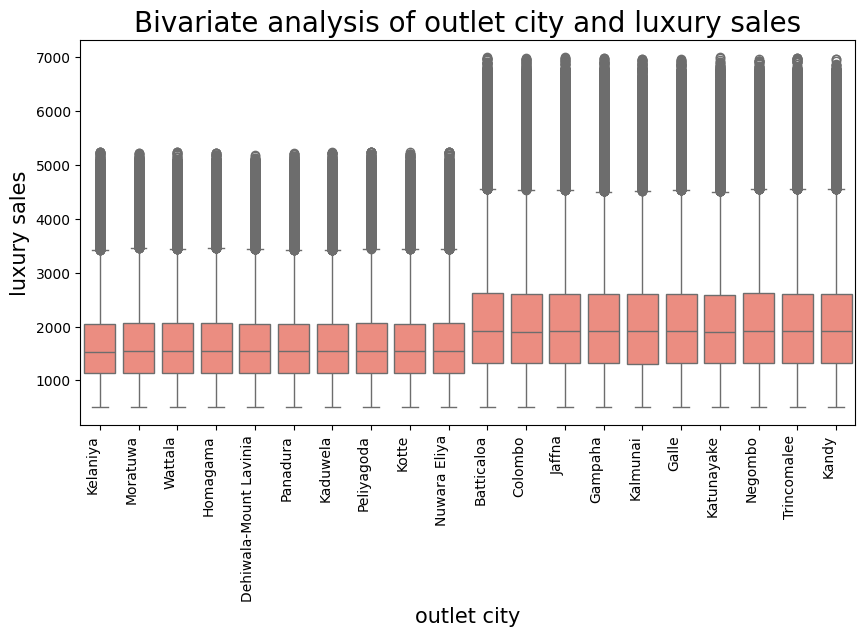

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['outlet_city'] , y= traindf["luxury_sales"], color= '#fd7f6f')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('outlet city',fontsize = 15)
ax.set_ylabel('luxury sales', fontsize = 15)
ax.set_title('Bivariate analysis of outlet city and luxury sales', fontsize= 20)

Text(0.5, 1.0, 'Bivariate analysis of outlet city and fresh sales')

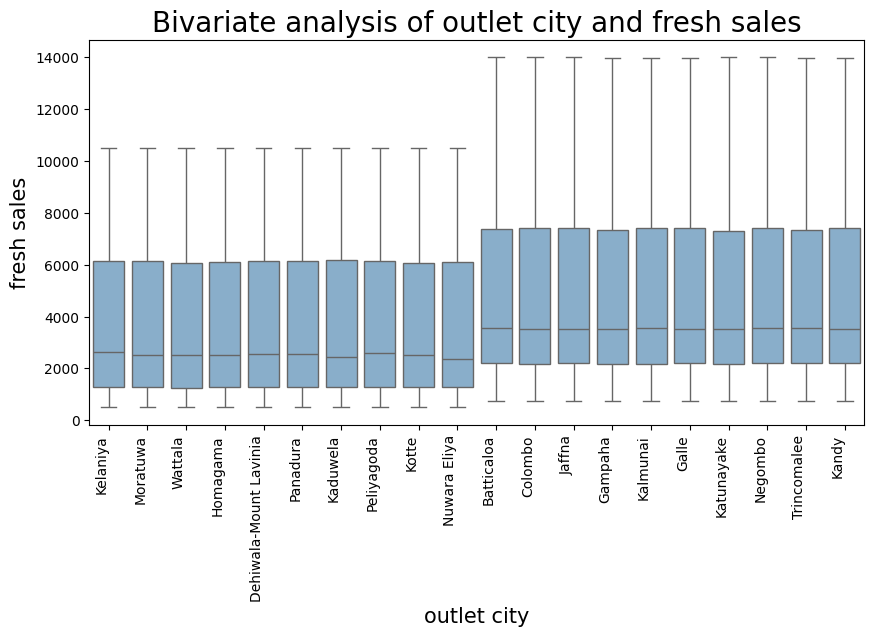

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['outlet_city'] , y= traindf["fresh_sales"], color= '#7eb0d5')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('outlet city',fontsize = 15)
ax.set_ylabel('fresh sales', fontsize = 15)
ax.set_title('Bivariate analysis of outlet city and fresh sales', fontsize= 20)

<ipython-input-30-62e336aa9a9f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="cluster_catgeory", y="luxury_sales", data=traindf, palette="coolwarm")


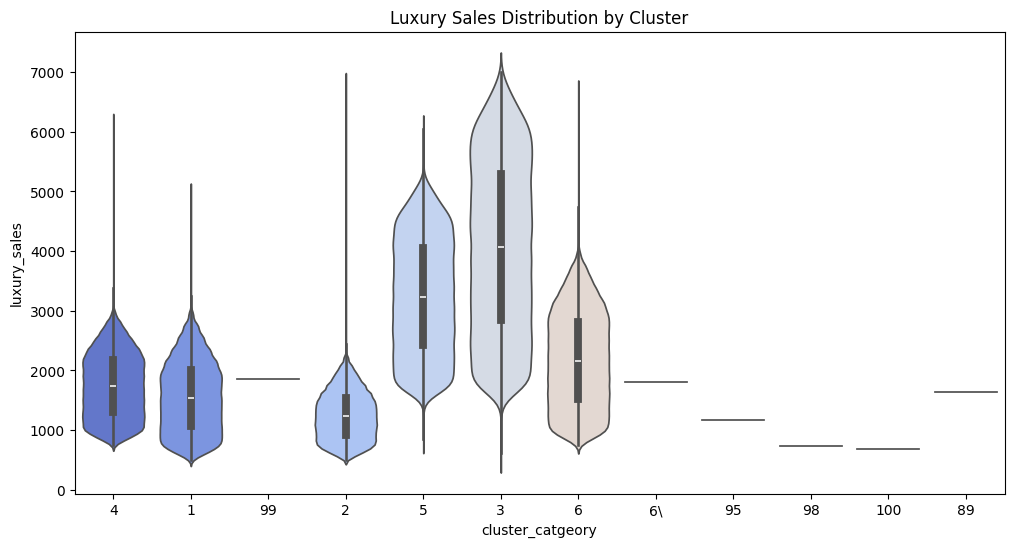

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x="cluster_catgeory", y="luxury_sales", data=traindf, palette="coolwarm")
plt.title("Luxury Sales Distribution by Cluster")
plt.show()

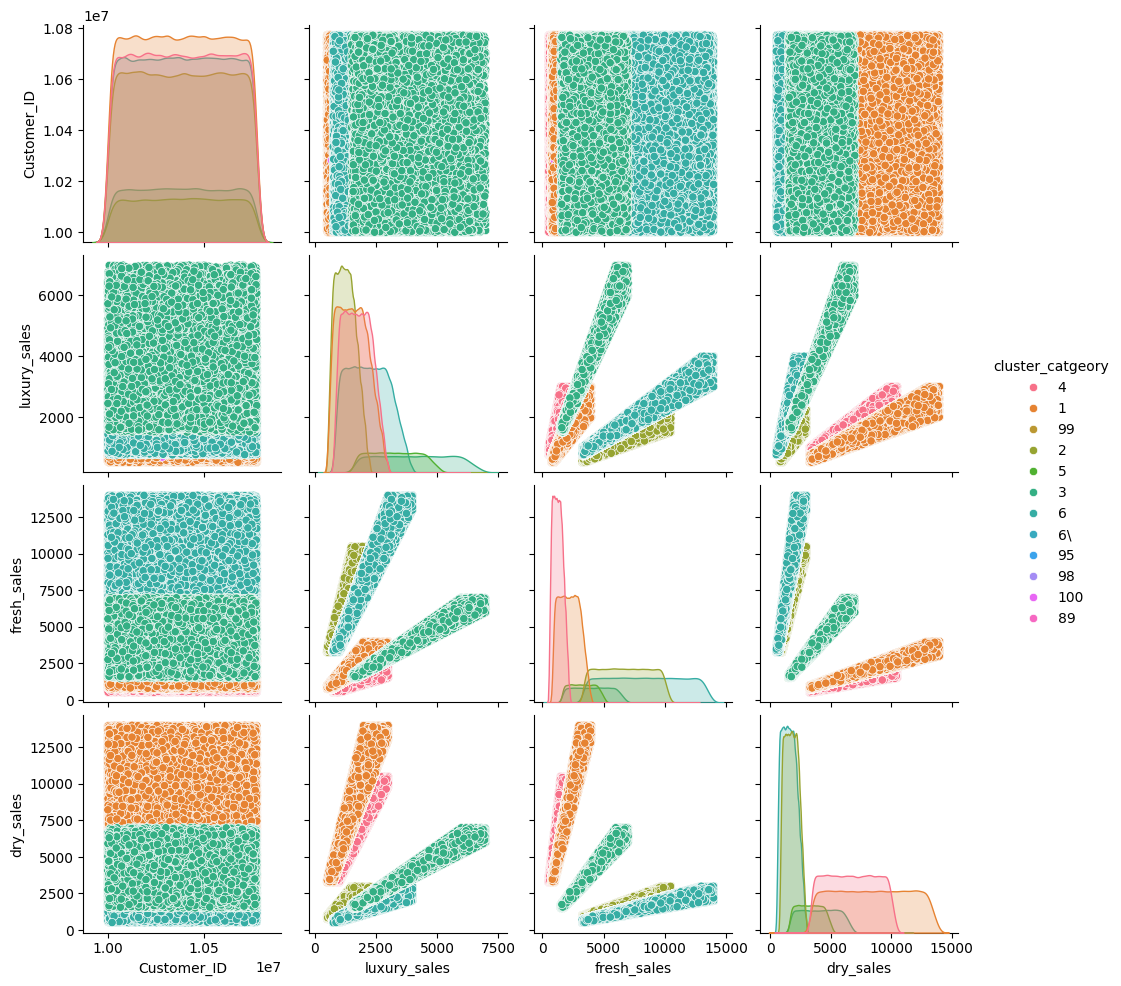

In [ ]:
sns.pairplot(traindf, hue="cluster_catgeory", palette="husl")
plt.show()

Multivariate analysis

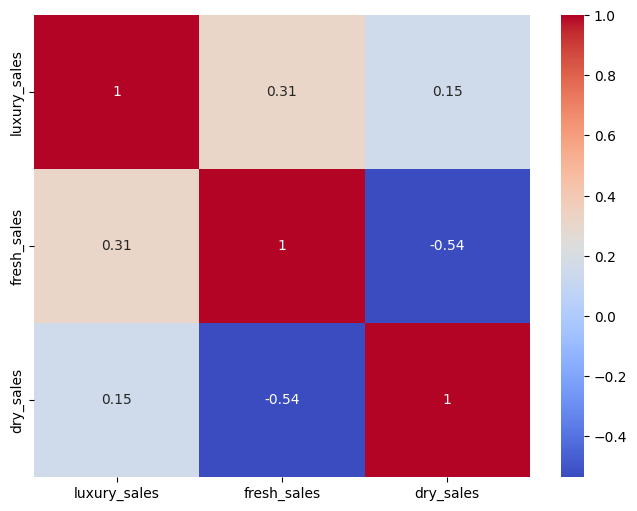

In [ ]:
#correlation matrix between the numeric values
plt.figure(figsize=(8,6))
sns.heatmap(traindf[['luxury_sales', 'fresh_sales', 'dry_sales']].corr(), annot=True, cmap="coolwarm")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


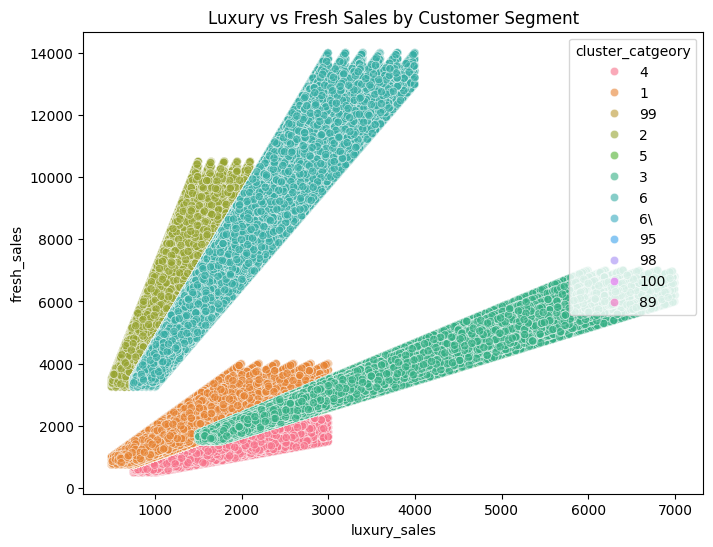

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=traindf, x='luxury_sales', y='fresh_sales', hue='cluster_catgeory', alpha=0.6)
plt.title("Luxury vs Fresh Sales by Customer Segment")
plt.show()

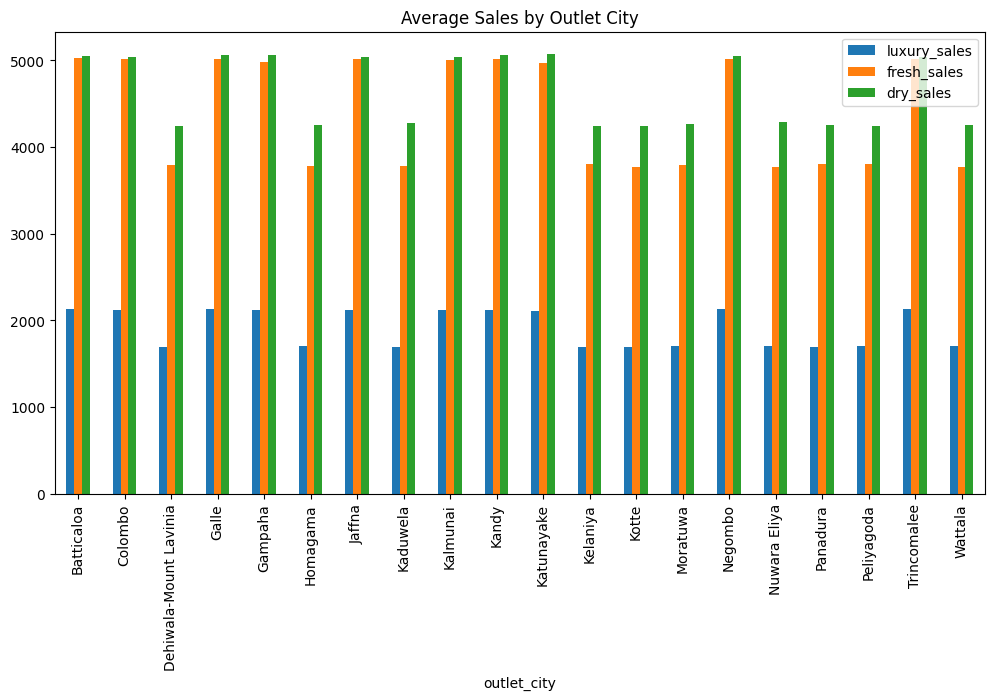

In [ ]:
#outlet city wise sales distribution
traindf.groupby("outlet_city")[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().plot(kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.show()

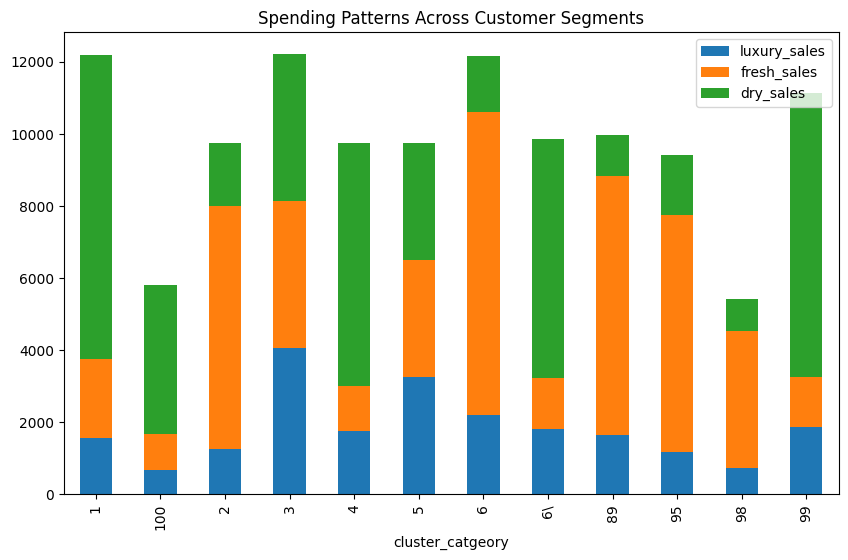

In [ ]:
#spending distributions by cluster
traindf.groupby("cluster_catgeory")[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().plot(
    kind="bar", stacked=True, figsize=(10,6)
)
plt.title("Spending Patterns Across Customer Segments")
plt.show()

Data pre processing

#Data Pre Processing

In [24]:
#renaming and fixing the misspeliling in cluster category column
traindf = traindf.rename(columns={'cluster_catgeory': 'cluster_category'})

traindf.head()

Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

  cluster_category  
0                4  
1                1  
2                4  
3                4  
4                4

In [25]:
# Identify all duplicate rows in traincsv dataset
duplicate_rows = traindf[traindf.duplicated(keep=False)]
print(f"Total Duplicates: {len(duplicate_rows)}")

Total Duplicates: 0


there are no duplicate values in the traincsv dataframe

In [26]:
#check for datapoints in the dataframe
datapoints = len(traindf)
datapoints

774155

In [27]:
#statistical view for each numerical column
traindf.describe()

Customer_ID   luxury_sales    fresh_sales      dry_sales
count  7.741530e+05  774110.000000  774105.000000  774117.000000
mean   1.038708e+07    1921.965255    4428.680047    4676.280399
std    2.234795e+05    1004.078513    3334.654673    3409.386733
min    1.000000e+07     500.000000     500.000000     500.000000
25%    1.019354e+07    1213.530000    1620.190000    1787.940000
50%    1.038708e+07    1715.280000    3356.480000    3727.760000
75%    1.058062e+07    2338.697500    6671.610000    7162.200000
max    1.077415e+07    6999.650000   13997.900000   13999.300000

In [28]:
#to identify no of rows and no of column in the dataset
traindf.shape

(774155, 6)

Handling the missing values in traindf dataset

In [29]:
#missing values in the traincsv
traincsv_missingvalues = traindf.isnull().sum()
traincsv_missingvalues

Customer_ID          2
outlet_city          2
luxury_sales        45
fresh_sales         50
dry_sales           38
cluster_category     1
dtype: int64

In [30]:
#Handling the missing values in sales columns using median
traindf['luxury_sales'] = traindf['luxury_sales'].fillna(traindf['luxury_sales'].median())
traindf['fresh_sales'] = traindf['fresh_sales'].fillna(traindf['fresh_sales'].median())
traindf['dry_sales'] = traindf['dry_sales'].fillna(traindf['dry_sales'].median())

In [31]:
#missing values in the traincsv dataframe after filling sales values
traincsv_missingvalues = traindf.isnull().sum()
traincsv_missingvalues

Customer_ID         2
outlet_city         2
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    1
dtype: int64

In [32]:
#removing the missing value rows in customer id
traindf.dropna(subset=['Customer_ID'], inplace=True)

In [33]:
#removing the missing value rows in cluster categegory
traindf.dropna(subset=['cluster_category'], inplace=True)

In [34]:
#customer id 3560 removing blacklash in cluster category from '6\' to  '6'
traindf.loc[3560 ,"cluster_category"] ='6'

In [35]:
#results after removing blacklash in cluster category value
converted_txt_values = [3560]
traindf.loc[converted_txt_values]

Customer_ID             outlet_city  luxury_sales  fresh_sales  \
3560   10604532.0  Dehiwala-Mount Lavinia       1811.34      1408.82   

      dry_sales cluster_category  
3560    6641.58                6

In [36]:
#removing rows which has value more than 6 in cluster category
values_to_remove = ['99', '95','98','100','89']

traindf = traindf[~traindf['cluster_category'].isin(values_to_remove)]

In [37]:
traindf = traindf[traindf['cluster_category'] != '99']

In [38]:
unique_values = traindf['cluster_category'].unique()
print(unique_values)

['4' '1' '2' '5' '3' '6']


In [39]:
#Calculating the mode of outlet_city (most frequnt no used in outlet_City column)
outlet_city_mode = traindf['outlet_city'].mode()[0]

# Filling missing values in outlet_city with the mode
traindf['outlet_city'] = traindf['outlet_city'].fillna(outlet_city_mode)

In [40]:
#overall missing values in the traincsv dataframe after filling and removing
traincsv_missingvalues = traindf.isnull().sum()
traincsv_missingvalues

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    0
dtype: int64

In [41]:
# Create the contingency table
contingency_table = pd.crosstab(traindf['outlet_city'], traindf['cluster_category'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
cluster_category            1      2     3      4     5      6
outlet_city                                                   
Batticaloa              18960      2  4901      0     2  17147
Colombo                 19023      0  4959      3     2  17046
Dehiwala-Mount Lavinia      1  15648     0  17283  3902      4
Galle                   19034      2  4932      1     3  17037
Gampaha                 18763      1  4833      0     1  16654
Homagama                    2  15464     0  17220  3951      1
Jaffna                  18821      2  4906      3     2  16940
Kaduwela                    1  15478     1  17360  3853      2
Kalmunai                18852      3  4831      1     1  17022
Kandy                   18898      0  4843      2     0  16791
Katunayake              19080      2  4818      0     2  16746
Kelaniya                    1  15364     0  16802  3800      3
Kotte                       2  15500     1  17252  4029      4
Moratuwa                    2  15387

EDA After pre data rpocessing

#EDA after Pre Processing

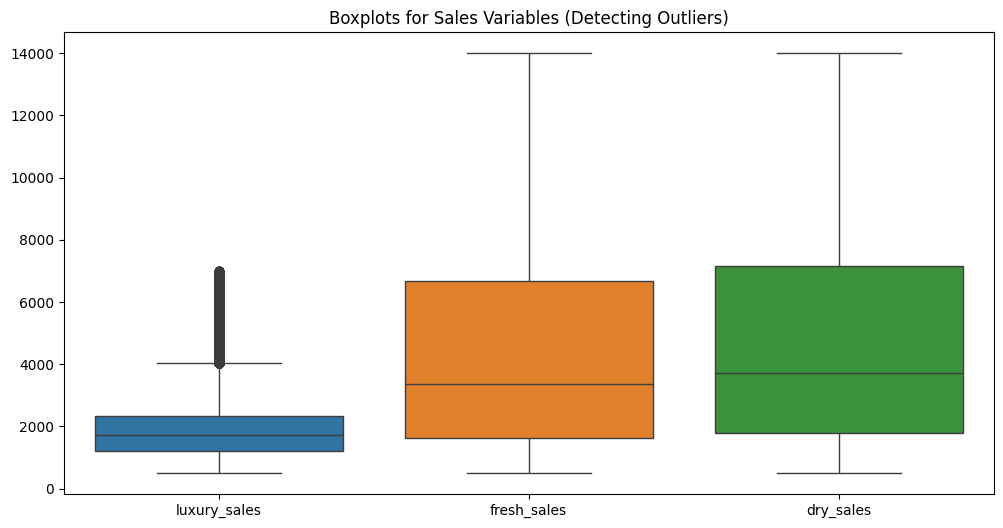

In [42]:
#Boxplots to Identify Outliers in sales columns

plt.figure(figsize=(12,6))
sns.boxplot(data=traindf[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.title("Boxplots for Sales Variables (Detecting Outliers)")
plt.show()

In [43]:
#removing outliers in sales coloumns
for column in ['luxury_sales', 'fresh_sales', 'dry_sales']:
    Q1 = traindf[column].quantile(0.25)
    Q3 = traindf[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    traindf = traindf[(traindf[column] >= lower_bound) & (traindf[column] <= upper_bound)]

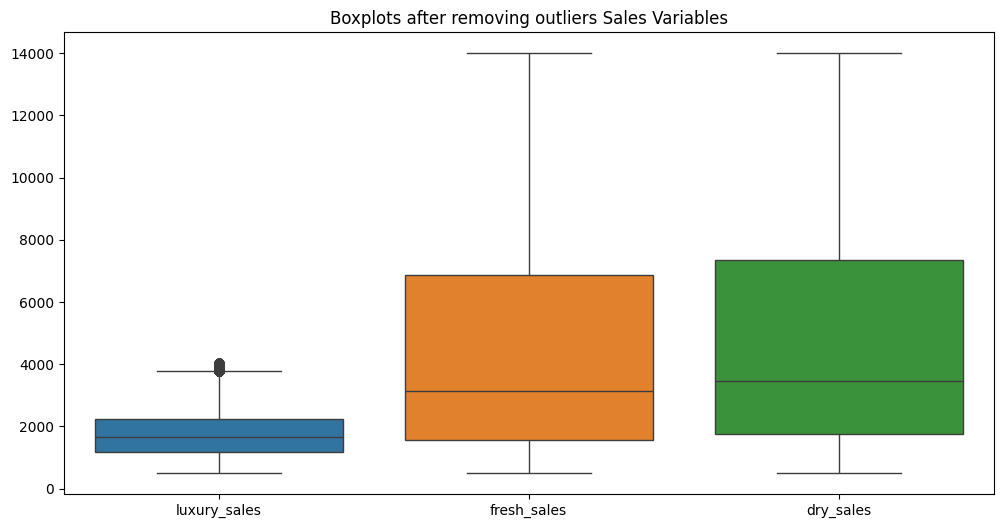

In [44]:
#Boxplots after removing  Outliers in sales columns

plt.figure(figsize=(12,6))
sns.boxplot(data=traindf[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.title("Boxplots after removing outliers Sales Variables")
plt.show()


In [ ]:
#datapoints after removing outliers
datapoints = len(traindf)
datapoints

739088

Text(0.5, 1.0, 'Distribution of luxury sales')

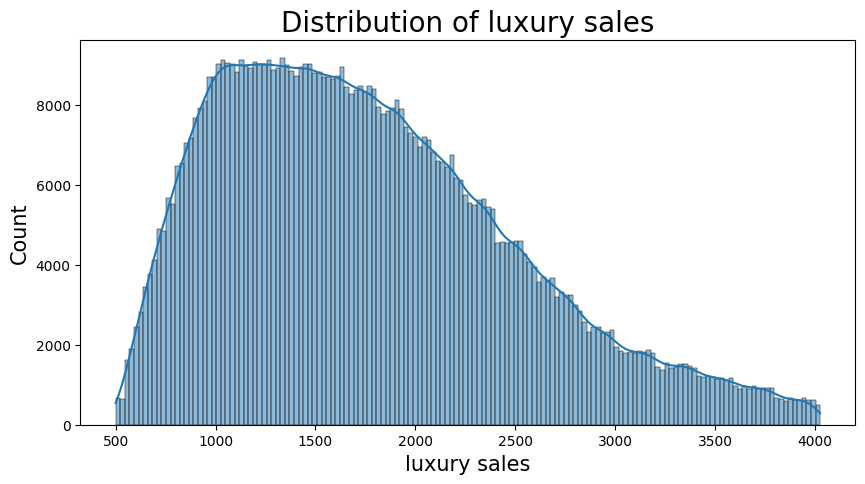

In [ ]:
#Distribution of luxury sales
plt.figure(figsize= (10,5))
ax = sns.histplot( data = traindf, x= traindf["luxury_sales"], kde=True)
ax.set_xlabel('luxury sales',fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Distribution of luxury sales', fontsize= 20)

Text(0.5, 1.0, 'Distribution of fresh sales')

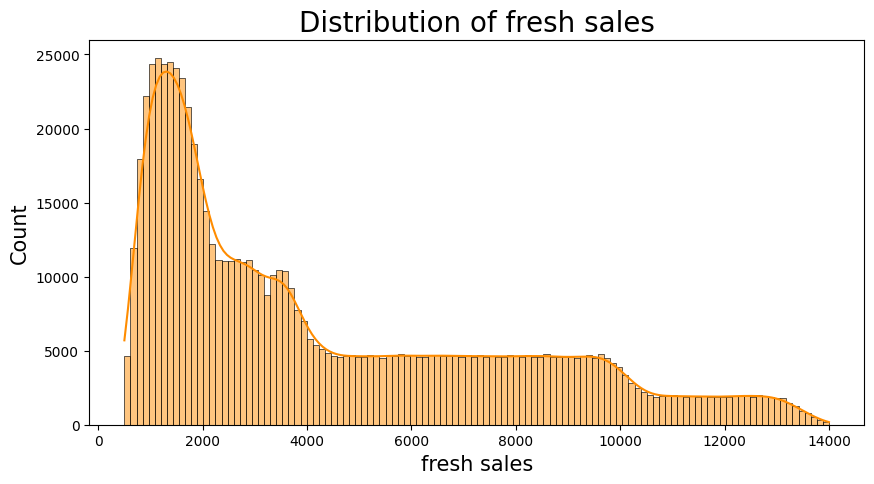

In [ ]:
#Distribution of fresh sales
plt.figure(figsize= (10,5))
ax = sns.histplot( data = traindf, x= traindf["fresh_sales"],kde=True,color = 'darkorange')
ax.set_xlabel('fresh sales',fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Distribution of fresh sales', fontsize= 20)

Text(0.5, 1.0, 'Distribution of dry sales')

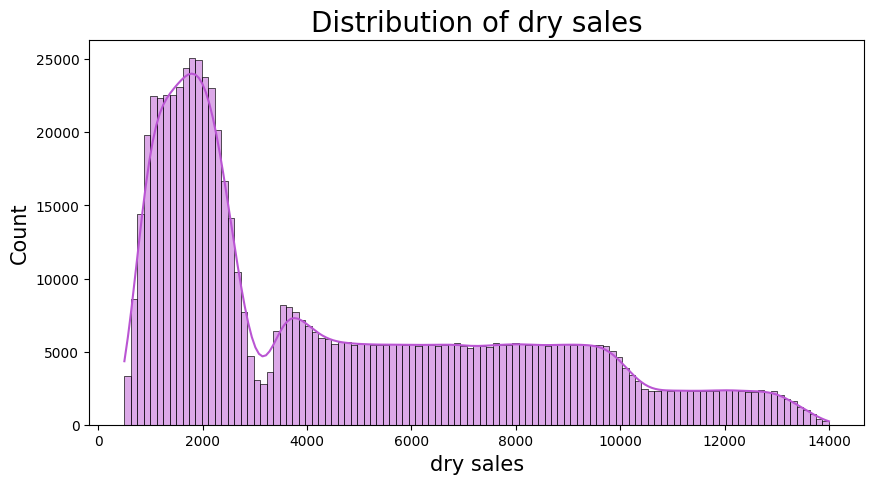

In [ ]:
#distribution of dry sales
plt.figure(figsize= (10,5))
ax = sns.histplot( data = traindf, x= traindf["dry_sales"],kde=True,color = 'MediumOrchid')
ax.set_xlabel('dry sales',fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Distribution of dry sales', fontsize= 20)

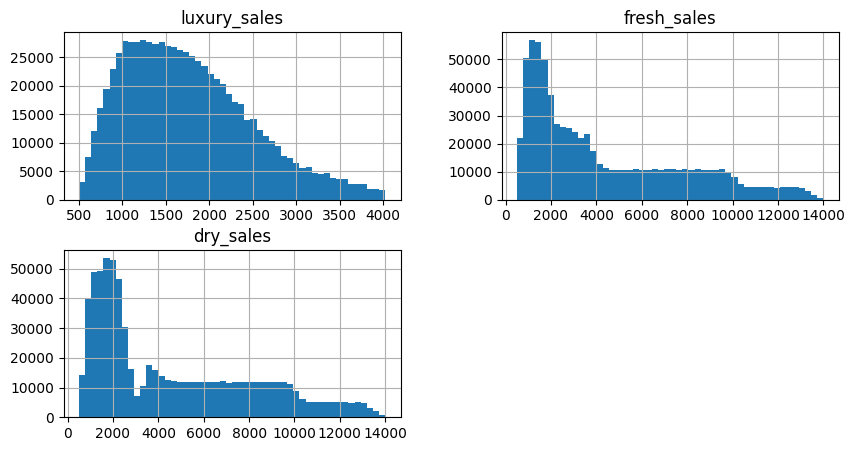

In [ ]:
#identifying the distribution of sales through histogram
traindf[['luxury_sales', 'fresh_sales', 'dry_sales']].hist(figsize=(10,5), bins=50)
plt.show()

Bivariate Analysis

Text(0.5, 1.0, 'Bivariate analysis of outlet city and luxury sales')

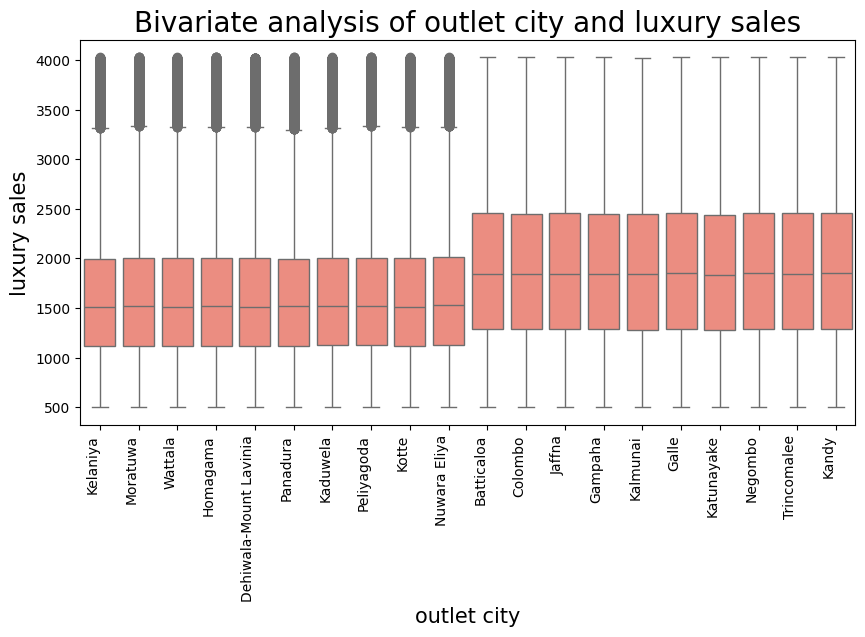

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['outlet_city'] , y= traindf["luxury_sales"], color= '#fd7f6f')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('outlet city',fontsize = 15)
ax.set_ylabel('luxury sales', fontsize = 15)
ax.set_title('Bivariate analysis of outlet city and luxury sales', fontsize= 20)

Text(0.5, 1.0, 'Bivariate analysis of fresh sales by cluster catgeory')

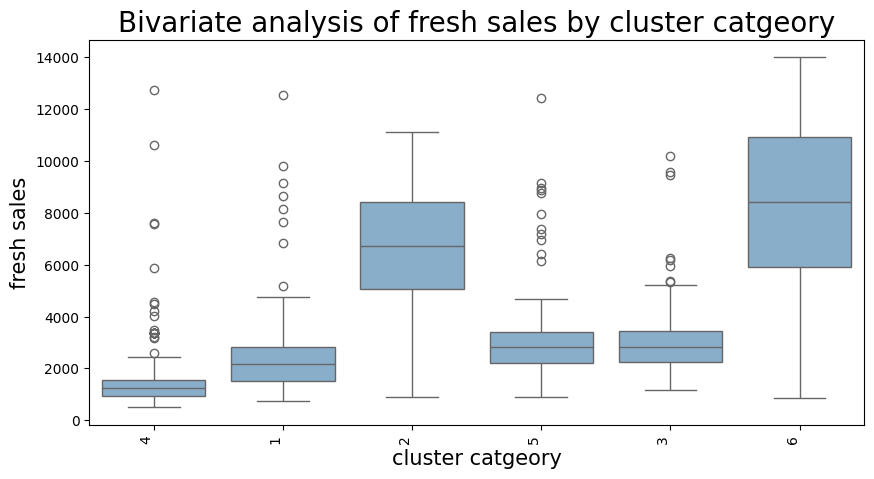

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['cluster_category'] , y= traindf["fresh_sales"], color= '#7eb0d5')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('cluster catgeory',fontsize = 15)
ax.set_ylabel('fresh sales', fontsize = 15)
ax.set_title('Bivariate analysis of fresh sales by cluster catgeory', fontsize= 20)

Text(0.5, 1.0, 'Bivariate analysis of fresh sales by cluster catgeory')

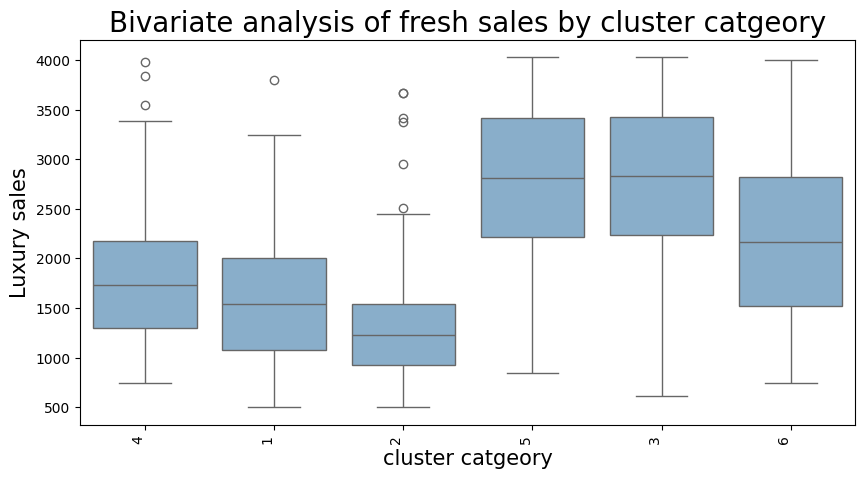

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['cluster_category'] , y= traindf["luxury_sales"], color= '#7eb0d5')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('cluster catgeory',fontsize = 15)
ax.set_ylabel('Luxury sales', fontsize = 15)
ax.set_title('Bivariate analysis of fresh sales by cluster catgeory', fontsize= 20)

Text(0.5, 1.0, 'Bivariate analysis of dry sales by cluster catgeory')

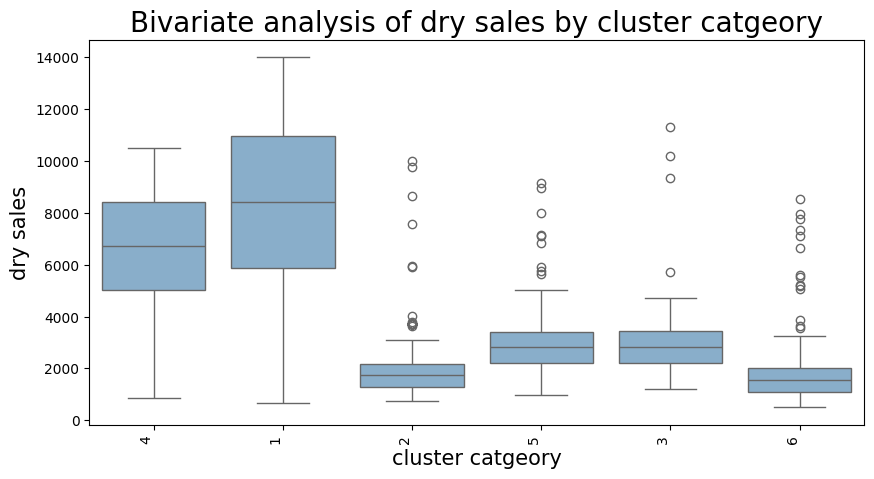

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['cluster_category'] , y= traindf["dry_sales"], color= '#7eb0d5')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('cluster catgeory',fontsize = 15)
ax.set_ylabel('dry sales', fontsize = 15)
ax.set_title('Bivariate analysis of dry sales by cluster catgeory', fontsize= 20)

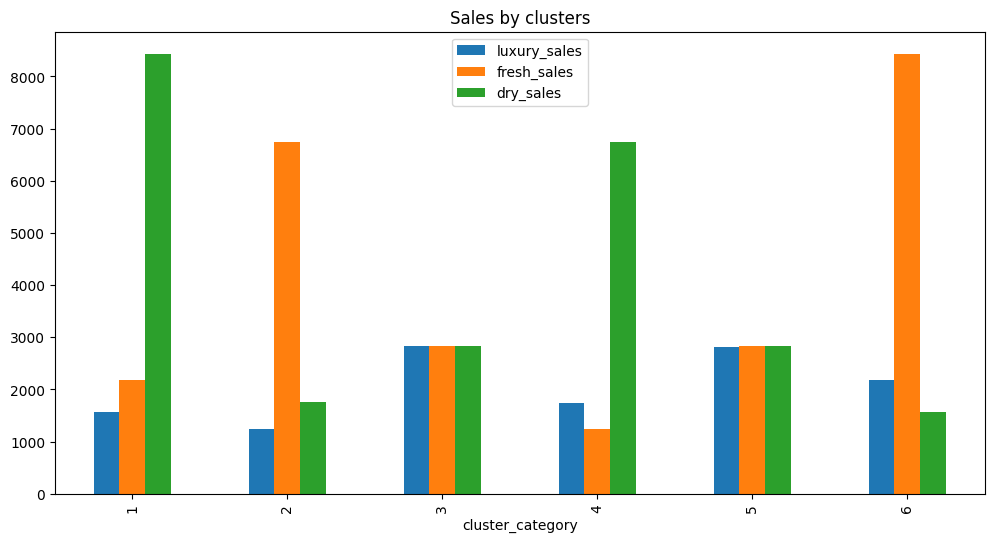

In [ ]:
traindf.groupby("cluster_category")[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().plot(kind="bar", figsize=(12,6))
plt.title("Sales by clusters")
plt.show()

Text(0.5, 1.0, 'Bivariate analysis of outlet city and fresh sales')

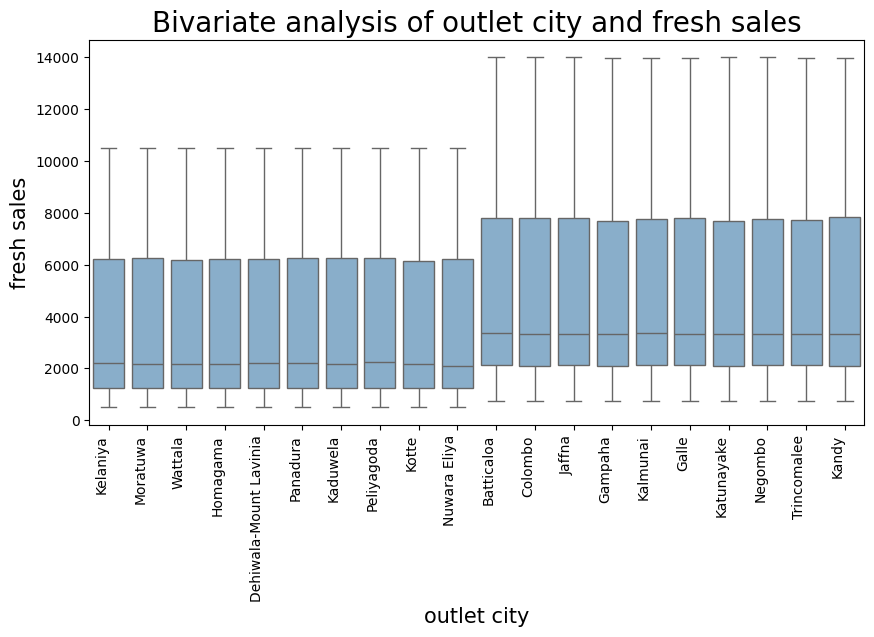

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['outlet_city'] , y= traindf["fresh_sales"], color= '#7eb0d5')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('outlet city',fontsize = 15)
ax.set_ylabel('fresh sales', fontsize = 15)
ax.set_title('Bivariate analysis of outlet city and fresh sales', fontsize= 20)

<ipython-input-70-e7bb0fc587c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="cluster_category", y="luxury_sales", data=traindf, palette="coolwarm") # Changed 'cluster_catgeory' to 'cluster_category'


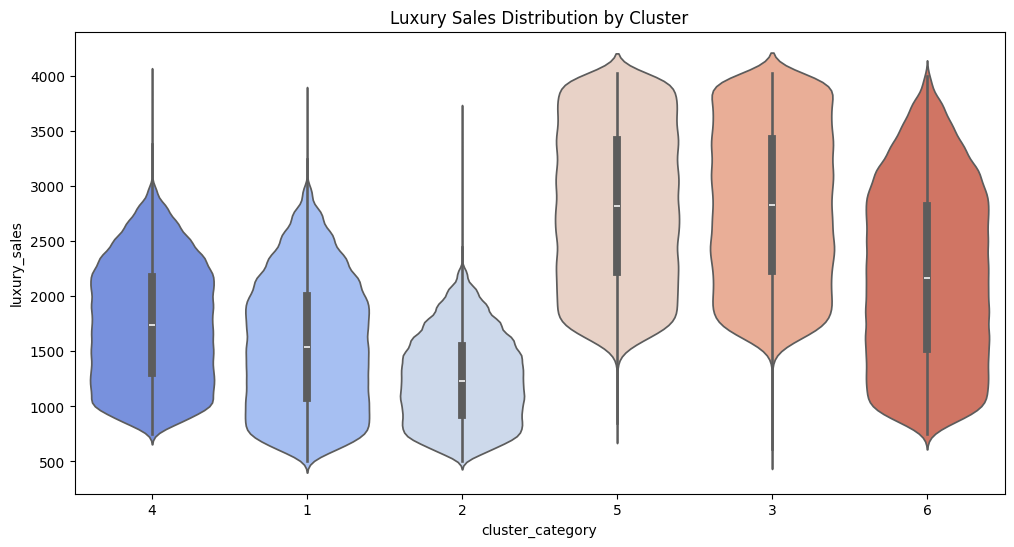

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x="cluster_category", y="luxury_sales", data=traindf, palette="coolwarm") # Changed 'cluster_catgeory' to 'cluster_category'
plt.title("Luxury Sales Distribution by Cluster")
plt.show()

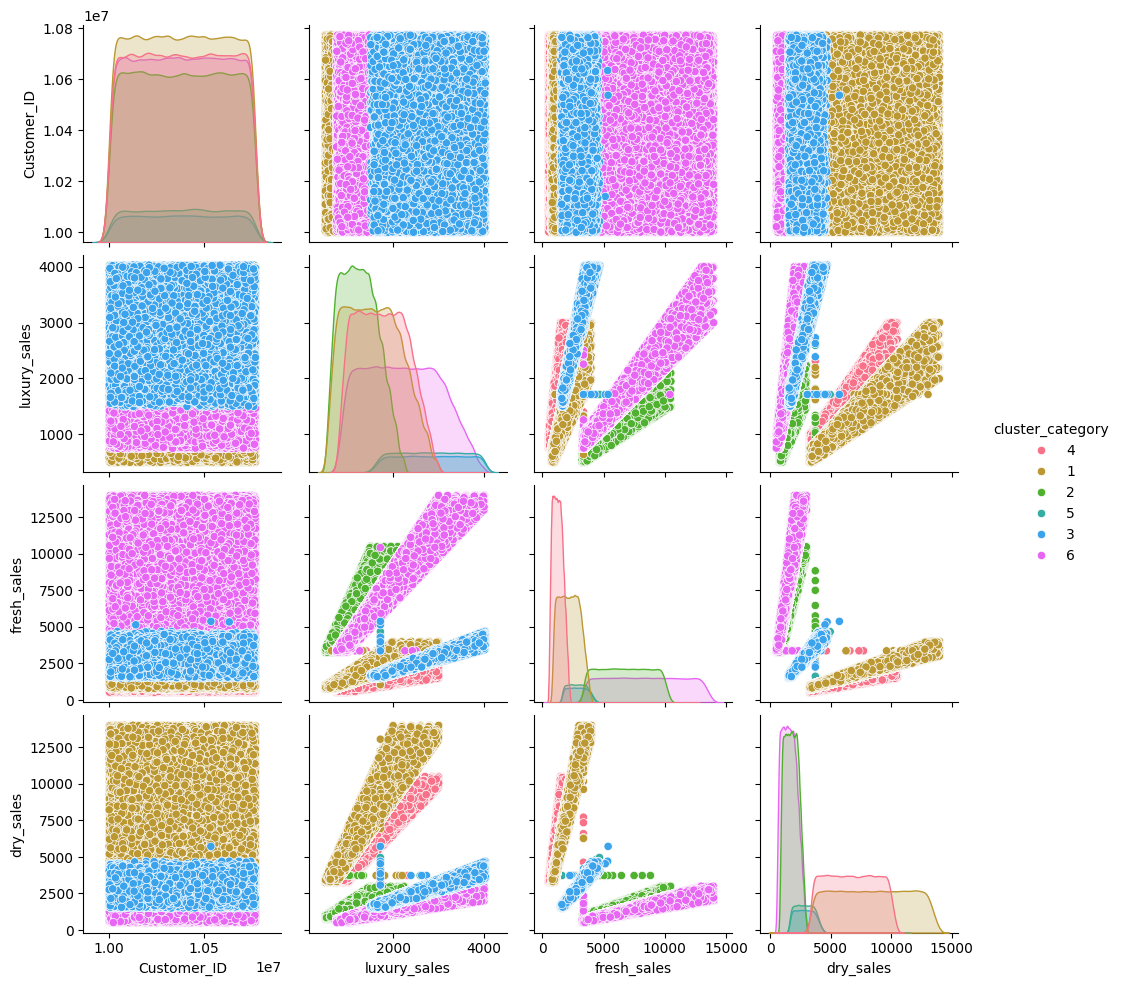

In [ ]:
sns.pairplot(traindf, hue="cluster_category", palette="husl")
plt.show()

Multivariate Analysis

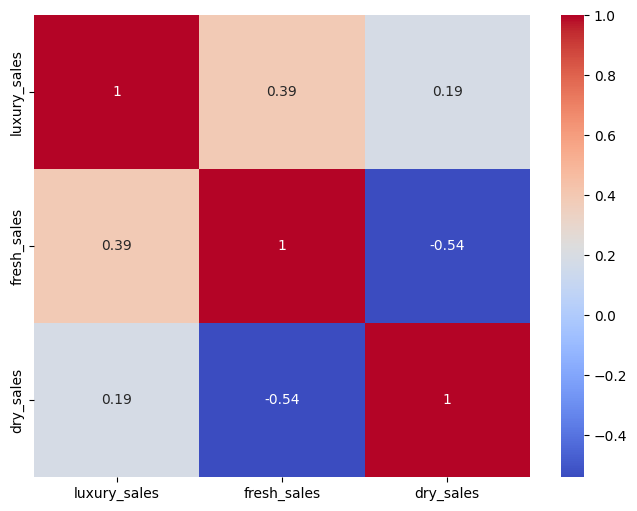

In [ ]:
#correlation matrix between the numeric values
plt.figure(figsize=(8,6))
sns.heatmap(traindf[['luxury_sales', 'fresh_sales', 'dry_sales']].corr(), annot=True, cmap="coolwarm")
plt.show()

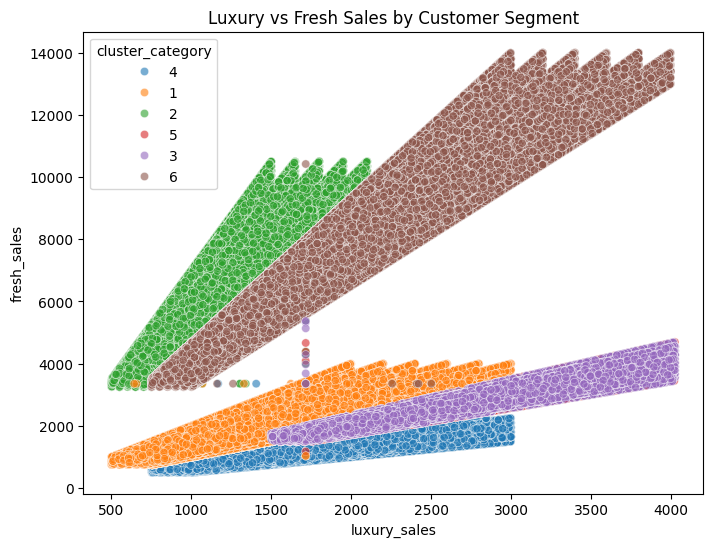

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=traindf, x='luxury_sales', y='fresh_sales', hue='cluster_category', alpha=0.6)
plt.title("Luxury vs Fresh Sales by Customer Segment")
plt.show()

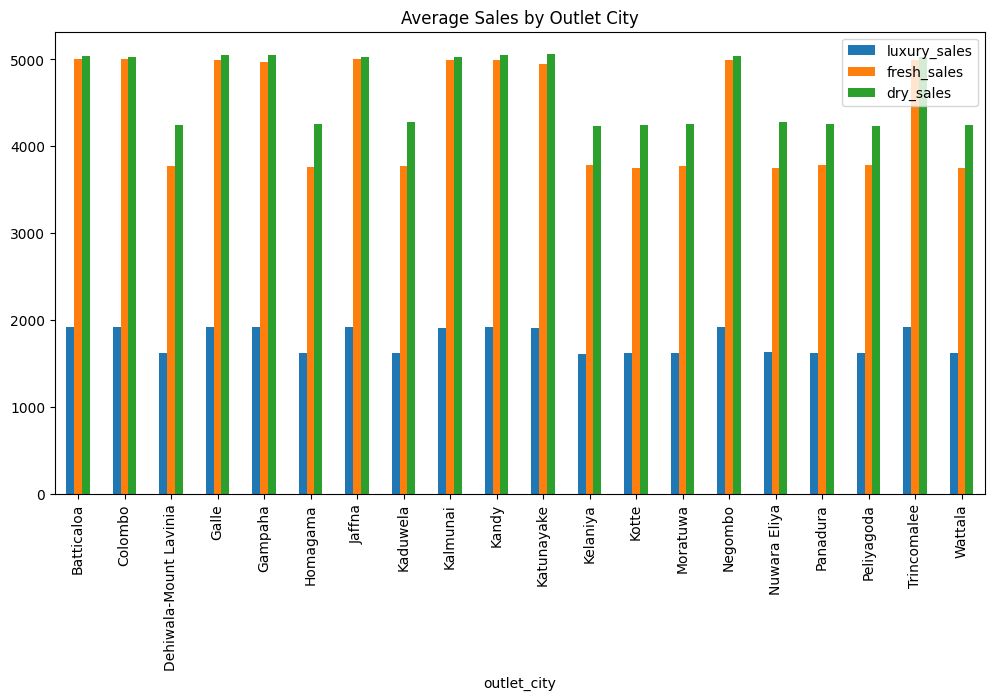

In [ ]:
#outlet city wise sales distribution
traindf.groupby("outlet_city")[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().plot(kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.show()

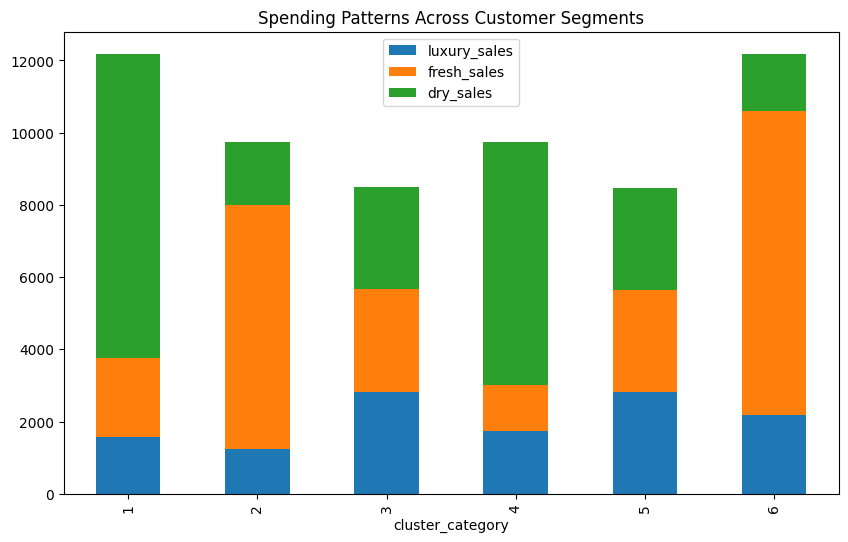

In [ ]:
#spending distributions by cluster
traindf.groupby("cluster_category")[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().plot(
    kind="bar", stacked=True, figsize=(10,6)
)
plt.title("Spending Patterns Across Customer Segments")
plt.show()

In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739088 entries, 0 to 774150
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       739088 non-null  float64
 1   outlet_city       739088 non-null  object 
 2   luxury_sales      739088 non-null  float64
 3   fresh_sales       739088 non-null  float64
 4   dry_sales         739088 non-null  float64
 5   cluster_category  739088 non-null  object 
dtypes: float64(4), object(2)
memory usage: 55.6+ MB


In [ ]:
traindf.head()

Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

  cluster_category  
0                4  
1                1  
2                4  
3                4  
4                4

Feature engineering

In [46]:
# Define the list of urban cities
Urban_cities = ['Colombo','Batticaloa','Gampaha','Jaffna', 'Kandy', 'Galle', 'Negombo','Katunayake','Trincomalee','Kalmunai']

# Now use the defined variable in the apply function
traindf['outlet_type'] = traindf['outlet_city'].apply(lambda x: 'Urban' if x in Urban_cities else 'Sub-urban')

In [47]:
traindf

Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0        10493832.0    Kelaniya       1209.60       756.00    5292.00   
1        10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2        10513916.0     Wattala       2288.88      1481.04    9155.52   
3        10334589.0     Wattala       2274.94      1739.66    9099.76   
4        10458365.0    Kelaniya       2345.49      2069.55    9243.99   
...             ...         ...           ...          ...        ...   
774145   10764536.0     Colombo       1644.80      1593.40    1747.60   
774146   10134170.0     Colombo       3796.80      3678.15    3915.45   
774147   10493702.0  Katunayake       2624.65      2249.70    3727.76   
774149   10204308.0  Katunayake       2389.76      2240.40    2613.80   
774150   10197979.0     Gampaha       3893.40      3893.40    3448.44   

       cluster_category outlet_type  
0                     4   Sub-urban  
1                     1   Sub-urban  
2                     4   Sub-urban  
3                     4   Sub-urban  
4                     4   Sub-urban  
...                 ...         ...  
774145                3       Urban  
774146                3       Urban  
774147                3       Urban  
774149                3       Urban  
774150                3       Urban  

[739088 rows x 7 columns]

In [48]:
!pip install category_encoders
import category_encoders as ce

# Assuming traindf is your DataFrame

# 1. Create a BinaryEncoder object
encoder = ce.BinaryEncoder(cols=['outlet_city'])

# 2. Fit and transform the data
traindf = encoder.fit_transform(traindf)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.5 MB/s eta 0:00:00


In [49]:
traindf.head()

Customer_ID  outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
0   10493832.0              0              0              0              0   
1   10178643.0              0              0              0              1   
2   10513916.0              0              0              0              1   
3   10334589.0              0              0              0              1   
4   10458365.0              0              0              0              0   

   outlet_city_4  luxury_sales  fresh_sales  dry_sales cluster_category  \
0              1       1209.60       756.00    5292.00                4   
1              0       1590.12      1060.08    6007.12                1   
2              1       2288.88      1481.04    9155.52                4   
3              1       2274.94      1739.66    9099.76                4   
4              1       2345.49      2069.55    9243.99                4   

  outlet_type  
0   Sub-urban  
1   Sub-urban  
2   Sub-urban  
3   Sub-urban  
4   Sub-urban

In [50]:
#Robust scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaled_data = scaler.fit_transform(traindf[['luxury_sales', 'fresh_sales', 'dry_sales']])
# Creating a DataFrame with the scaled data and original column names
scaled_df = pd.DataFrame(scaled_data, columns=['luxury_sales', 'fresh_sales', 'dry_sales'], index=traindf.index)

# Updating the original DataFrame with the scaled values
traindf[['luxury_sales', 'fresh_sales', 'dry_sales']] = scaled_df[['luxury_sales', 'fresh_sales', 'dry_sales']]
traindf.head()

Customer_ID  outlet_city_0  outlet_city_1  outlet_city_2  outlet_city_3  \
0   10493832.0              0              0              0              0   
1   10178643.0              0              0              0              1   
2   10513916.0              0              0              0              1   
3   10334589.0              0              0              0              1   
4   10458365.0              0              0              0              0   

   outlet_city_4  luxury_sales  fresh_sales  dry_sales cluster_category  \
0              1     -0.439830    -0.449339   0.324965                4   
1              0     -0.074139    -0.391966   0.452208                1   
2              1      0.597391    -0.312540   1.012410                4   
3              1      0.583994    -0.263745   1.002488                4   
4              1      0.651795    -0.201502   1.028152                4   

  outlet_type  
0   Sub-urban  
1   Sub-urban  
2   Sub-urban  
3   Sub-urban  
4   Sub-urban

In [51]:
encoded_columns = [col for col in traindf.columns if col.startswith('outlet_city')]


In [52]:
traindf.to_csv('cleanedtrain_data.csv', index=False)